<a href="https://www.kaggle.com/code/ayushs9020/re-creating-linear-regression-derivation?scriptVersionId=136388457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression 

$Linear$ $Regression$ is a `statistical method` that uses a `linear model` to predict the value of a `dependent variable (y)` from one or more `independent variables (x)`. The linear model is a mathematical equation that describes the relationship between the independent and dependent variables.

# 1 | Basic Terminologies 🧿

* $Slope$
* $Diffrentiation$
* $Intercept$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import IFrame

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.1 | Slope of A function

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [2]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 1000 , 400)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

## 1.2 | Diffrentiation

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`.

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [3]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 1000 , 400)

So now we have a basic idea of `slope`

## 1.3 | Intercept

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 


In [4]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 1000 , 400)

This line passes the axis at $(0 , 0)$. These coordinates are called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values. 

# 2 | Intution 🌌

In [5]:
import os
import tqdm
import pandas as pd 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


Lets assume we have data like this

In [6]:
features = np.array([x for x in range(0 , 200 , 1)])

features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
target = np.array([x for x in range(0 , 400 , 2)])

target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a double of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [8]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])

target

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

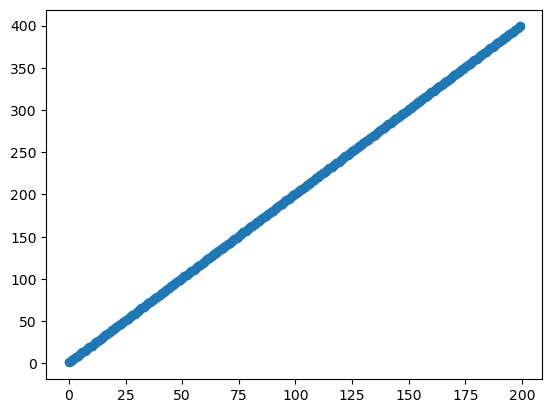

In [9]:
plt.scatter(features , target)

We can see we got a sequence of dots that resembles kind of straight line 

Lets assume we have a line that tries to capture most of the points on this, like this

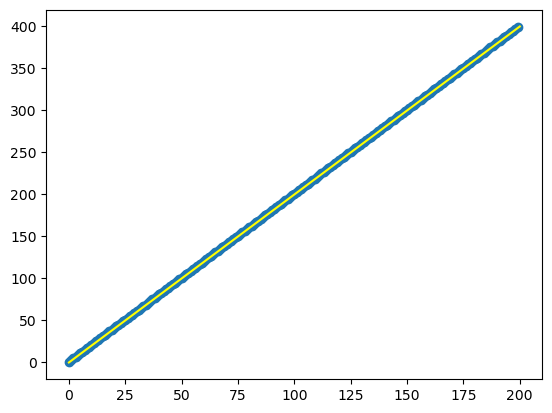

In [10]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we get this kind of 

<Axes: ylabel='num_sold'>

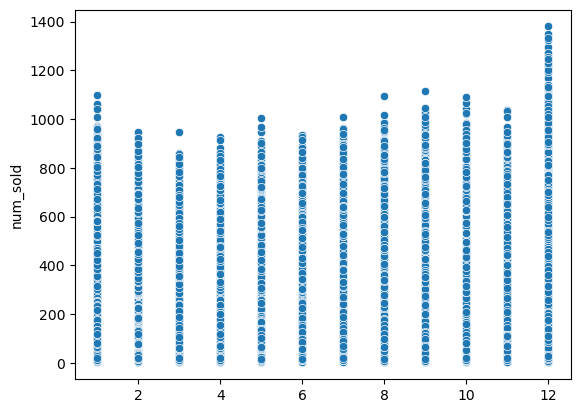

In [11]:
data = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")

features = np.array([x for x in pd.DatetimeIndex(pd.to_datetime(data["date"])).month])

target = data["num_sold"]

sns.scatterplot(x = features , y = target)

At this point it becomes difficult 

Lets assume we randomly select a line 

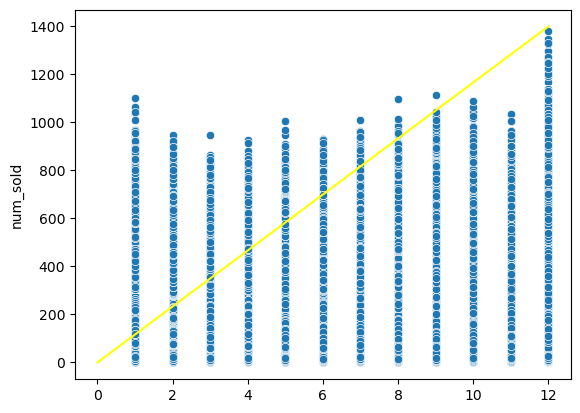

In [12]:
sns.scatterplot(x = features , y = target)
plt.plot([0 , 12] , [0 , 1400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

The word difference here is very difficult to say, so we can give this term a new fancy name, which is `The Loss`.

One can deifne loss as $$Loss = actual - predicted$$.

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683" width = 400>

If we look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$
But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [13]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 1000 , 400)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

# 3 | Derivations 💡

So now our loss function is $$Loss = \sum\limits_{i = 1}^{n}(y - \hat y)^2_{------(1)}$$

So now our main goal is to find values of `slope` and `intercept` that minimizes the `Loss`. We know that 

$$\hat y_i = mx_i + b_{------(2)}$$

Putting $eq(1)$ in $eq(2)$, we get 

$$Loss = \sum\limits_{i = 1}^{n}(y_i - (x_i + b))^2$$

$$= \sum\limits_{i = 1}^{n}(y_i - x_i -b)^2_{------(3)}$$

Diffrentiating $eq(3)$ wrt $(m)$ and $(b)$, we get 

$$\frac {dLoss}{db} = \frac {d(\sum\limits_{i = 1}^{n}(y_i - x_i - b)^2)}{db}$$
Taking `Summision` outside(we do not diffrentiate summision)
$$= \sum\limits_{i = 1}^{n}\frac {d(y_i - x_i - b)^2)}{db}$$
Applying the same formula $x^{n^`} = nx^{n - 1}x^`$
$$= \sum\limits_{i = 1}^{n}2(y_i - mx_i - b)(-1)$$
$$= \sum\limits_{i = 1}^{n}-2(y_i - mx_i - b)$$

For minimu loss this function should be equal to zero...

$$\frac {dLoss}{db} = 0 => \sum\limits_{i = 1}^{n}-2(y_i - mx_i - b) = 0$$
Dividing by $n$ both the sides we get 
$$=> \frac {1}{n}\sum\limits_{i = 1}^{n}(-2(y_i - mx_i - b)) = 0$$
$$=> \sum\limits_{i = 1}^{n}\frac {1}{n}(2(y_i - mx_i - b)) = 0$$
$$=> \sum\limits_{i = 1}^{n}\frac {1}{n}(y_i - mx_i - b) = 0$$
$$=> \sum\limits_{i = 1}^{n}\frac {y_i}{n} - \sum\limits_{i = 1}^{n}\frac {mx_i}{n} - \sum\limits_{i = 1}^{n}\frac {b}{n} = 0$$
$$=> y_{mean} - mx_{mean} - b = 0$$
$$=> b = y_{mean} - mx{mean}_{-----(4)}$$

Now diffrentiating wrt $(b)$ , we get 

$$\frac {dLoss}{dm} = \sum\limits_{i = 1}^{n}\frac {(y_i - mx_i - b)^2}{dm}$$

From $eq(4)$

$$= \sum\limits_{i = 1}^{n}\frac {(y_i - mx_i - y_{mean} + mx_{mean})^2}{dm}$$

$$= \sum\limits_{i = 1}^{n}2(y_i - mx_i - y_{mean} + mx_{mean})(-x_i + x_{mean})$$
As we are to minimise this also, so 
$$\frac {dLoss}{dm} = 0 => \sum\limits_{i = 1}^{n}2(y_i - mx_i - y_{mean} + mx_{mean})(-x_i + x_{mean}) = 0$$

$$=> 2(y_i - mx_i - y_{mean} + mx_{mean}) = 0$$

$$=> (y_i - mx_i - y_{mean} + mx_{mean}) = 0$$

Taking $m$ common

$$=> m(x_{mean} - x_i) + y_i - y_{mean} = 0$$

$$m(x_{mean} - x_i) = y_{mean} - y_i $$

$$m = \frac {y_{mean} - y_i}{x_{mean} - x_i}$$

So now we have out values of $(m)$ and $(b)$
Now we just need to code these values

Lets assume we want to do the predicition of the data $x = 29$

First lets find the values of `m` and `b`.

First comes the `m`

# 4 | Making From Scratch 🥯

In [14]:
num = 0
den = 0

for i in tqdm.tqdm(range(features.shape[0]) , total = features.shape[0]):
    num += (features[i] - features.mean())*(target[i] - target.mean())
    den += (features[i] - features.mean())*(features[i] - features.mean())
    
num , den , num/den

100%|██████████| 136950/136950 [01:55<00:00, 1181.67it/s]


(811568.9989047002, 1628661.5553117755, 0.49830426478590334)

What we just calculated is `m`

In [15]:
m = num/den

Now lets try to find `b`

In [16]:
b = target.mean() - m*(features.mean())

b

162.27192383965152

Now we have our `m` and `b`. Now lets try to find the predicition of the testing value

In [17]:
b + m*12

168.25157501708236

So our predicted value should be $168.25$ (as of this run ). And thats the actual value.

Now lets try to implement this in a function

In [18]:
class LinearRegression():
    
    def __init__(self):
        self.m = None
        self.b = None
        self.pre = []

    def fit(self , X_train , Y_train):

        num = 0
        den = 0
    
        for i in range (X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = (Y_train.mean()) - ((self.m)*(X_train.mean()))

    def predict(self , X_test):

        for i in range(X_test.shape[0]):
      
            prediciton = self.b + (self.m * X_test[0])
      
            self.pre.append(prediciton)
    
        return self.pre

And we just created one of the simplest form of `Linear Regression`. Yayyyyyyyyy


# 5 | Functionalities ⚙️

Now we will add functionalities to this function

|Name|Attribute|Accpeted|Default|Info|Applied
|---|---|---|---|---|---
|$$Fit$$ $$Intercept$$|`fit_intercept`|`Bool`|`True`|Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered)|✅

## 5.1 | Fit Intercept

In [19]:
class LinearRegression():
    
    def __init__(self , fit_intercept = True):
        self.m = None
        self.b = None
        self.pre = []
        self.fit_intercept = fit_intercept

    def fit(self , X_train , Y_train):

        num = 0
        den = 0
    
        for i in range (X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        
        if fit_intercept:
            
            self.b = (Y_train.mean()) - ((self.m)*(X_train.mean()))
        
        else :
            
            self.b = 0

    def predict(self , X_test):

        for i in range(X_test.shape[0]):
      
            prediciton = self.b + (self.m * X_test[0])
      
            self.pre.append(prediciton)
    
        return self.pre

# 6 | Final Code 🌐

In [20]:
class LinearRegression():
    
    def __init__(self , fit_intercept = True):
        self.m = None
        self.b = None
        self.pre = []
        self.fit_intercept = fit_intercept

    def fit(self , X_train , Y_train):

        num = 0
        den = 0
    
        for i in range (X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(Y_train[i] - Y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        
        if fit_intercept:
            
            self.b = (Y_train.mean()) - ((self.m)*(X_train.mean()))
        
        else :
            
            self.b = 0

    def predict(self , X_test):

        for i in range(X_test.shape[0]):
      
            prediciton = self.b + (self.m * X_test[0])
      
            self.pre.append(prediciton)
    
        return self.pre

# 7 | Ending 🏁

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE  $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $!!!$**